In [2]:
import numpy as np
import pandas as pd

In [3]:
value = [1, 2, 3, 4, 5, 6, 7, 8,10]


In [4]:
grid = np.array([[value[0], value[1], value[2]], [value[3], value[4], value[5]], [value[6],value[7],value[8]]])
print(grid)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]


Best way of doing this: 


In [5]:
grid = np.array(value).reshape((3,3))
print(grid)

print(np.mean(grid, axis =1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
[2.         5.         8.33333333]


In [6]:
df = pd.read_csv('./Demographic-Data-Analyzer/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
race_count = pd.Series(df['race'].value_counts())
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [101]:
round(df['age'].loc[df['sex'] == 'Male'].mean(),1)

39.4

In [40]:
df['education'].loc[df['education'] == 'Bachelors'].value_counts()

Bachelors    5355
Name: education, dtype: int64

In [10]:
df['education'].value_counts().sum()

32561

In [44]:
df['education'].loc[df['education'] == 'Bachelors'].value_counts() / df['education'].value_counts().sum()

Bachelors    0.164461
Name: education, dtype: float64

In [102]:
df['education'].loc[df['education'] == 'Bachelors'].count() / df['education'].count().sum()

0.16446055096587942

In [111]:
round(df['education'].loc[df['education'] == 'Bachelors'].count() / df['education'].count().sum()*100,1)

16.4

In [45]:
maskhi = df['education'].isin(['Bachelors', 'Doctorate', 'Masters'])
masklo = ~df['education'].isin(['Bachelors', 'Doctorate', 'Masters'])
df['salary'][masklo].count()


25070

In [46]:
df['salary'][maskhi].count()

7491

In [15]:
4335 / 20715

0.20926864590876176

In [16]:
df['salary'][maskhi].value_counts().sum()

7491

In [17]:
df['salary'][maskhi].value_counts().sum()

7491

In [18]:
df['salary'][maskhi].loc[df['salary'] == '>50K'].value_counts().divide(df['salary'][maskhi].value_counts().sum()) 

>50K    0.465358
Name: salary, dtype: float64

In [112]:
np.round(df['salary'][maskhi].loc[df['salary'] == '>50K'].count() / df['salary'][maskhi].count().sum()*100,1)

46.5

In [20]:
df['salary'][masklo].loc[df['salary'] == '>50K'].value_counts().divide(df['salary'][masklo].value_counts().sum()) 

>50K    0.173714
Name: salary, dtype: float64

In [21]:
df['salary'][masklo].loc[df['salary'] == '>50K'].count() / df['salary'][masklo].count().sum()

0.173713601914639

In [22]:
df['hours-per-week'].min()

1

In [113]:
# maskminhour = df[['hours-per-week'] == df['hours-per-week'].min()]
# maskminhour
maskminhour = df['hours-per-week'] == df['hours-per-week'].min()


0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: hours-per-week, Length: 32561, dtype: bool

In [116]:
df[['hours-per-week']][maskminhour].count()

20

In [25]:
df['salary'][maskminhour].loc[df['salary'] == '>50K'].count()

2

In [26]:
df['salary'][maskminhour].count()

20

In [124]:
rich_percentage = int(df['salary'][maskminhour].loc[df['salary'] == '>50K'].count() / df['salary'][maskminhour].count()*100)
rich_percentage

10

In [126]:
int(df['salary'][maskminhour].loc[
        df['salary'] == '>50K'].count() / df['salary'][maskminhour].count()*100)

10

In [28]:
df.groupby(['native-country']).count().head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
?,583,583,583,583,583,583,583,583,583,583,583,583,583,583
Cambodia,19,19,19,19,19,19,19,19,19,19,19,19,19,19
Canada,121,121,121,121,121,121,121,121,121,121,121,121,121,121
China,75,75,75,75,75,75,75,75,75,75,75,75,75,75
Columbia,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [29]:
df.loc[df['native-country'] == '?'].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


In [30]:
df.loc[df['salary'] == '>50K'].groupby(['native-country']).count().sort_values('salary', ascending=False)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
United-States,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171,7171
?,146,146,146,146,146,146,146,146,146,146,146,146,146,146
Philippines,61,61,61,61,61,61,61,61,61,61,61,61,61,61
Germany,44,44,44,44,44,44,44,44,44,44,44,44,44,44
India,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Canada,39,39,39,39,39,39,39,39,39,39,39,39,39,39
Mexico,33,33,33,33,33,33,33,33,33,33,33,33,33,33
England,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Italy,25,25,25,25,25,25,25,25,25,25,25,25,25,25


In [31]:
df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
?,146,146,146,146,146,146,146,146,146,146,146,146,146,146
Cambodia,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Canada,39,39,39,39,39,39,39,39,39,39,39,39,39,39
China,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Columbia,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Cuba,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Dominican-Republic,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Ecuador,4,4,4,4,4,4,4,4,4,4,4,4,4,4
El-Salvador,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [32]:
maskgroup = df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()
maskgroup.loc[maskgroup['age'] == maskgroup['age'].max()]['age']

native-country
United-States    7171
Name: age, dtype: int64

In [122]:
# Correct version
maskrichhi = df.loc[df['salary'] == '>50K'].groupby(['native-country']).count()['age']
maskgroupall = df.groupby(['native-country']).count()['age']
earn_rich_percent_country = maskrichhi / maskgroupall
print(earn_rich_percent_country.idxmax(), ':', round(earn_rich_percent_country.max()*100,1))


Iran : 41.9


In [36]:
top_ocup = df.loc[(df['salary'] == '>50K') & (df['native-country'] == 'India')].groupby(['occupation']).count().idxmax()[0]
top_ocup

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
occupation,,,,,,,,,,,,,,
Adm-clerical,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Exec-managerial,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Other-service,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Prof-specialty,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Sales,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Tech-support,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Transport-moving,1,1,1,1,1,1,1,1,1,1,1,1,1,1



# Example of Masking
import pandas as pd

values = [1, 2, 3, 4]
series = pd.Series([0, 1, 2, 3, 4, 5])

mask = series.isin(values)
result = series[mask]

print(result)


import pandas as pd

df = pd.DataFrame({'item': ['apple', 'banana', 'cherry', 'date'],'price': [1, 2, 3, 4]})

max_index = df['price'].idxmax()
print(max_index)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [14]:
df = pd.read_csv('Sea-Level-Predictor/epa-sea-level.csv')




In [60]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


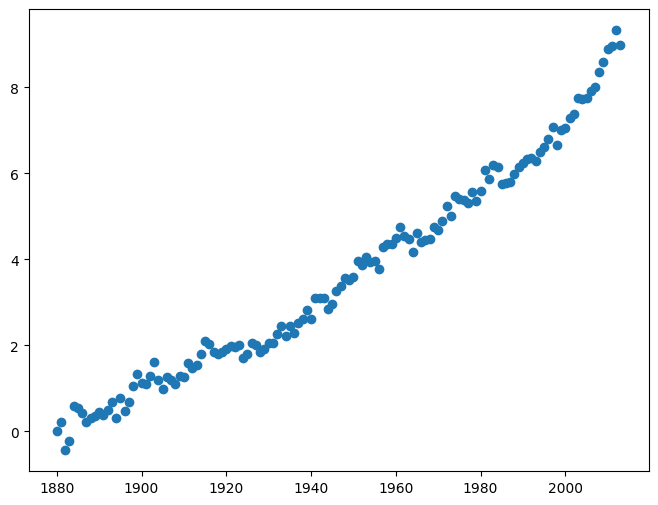

In [35]:
# Create scatter plot
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.show()

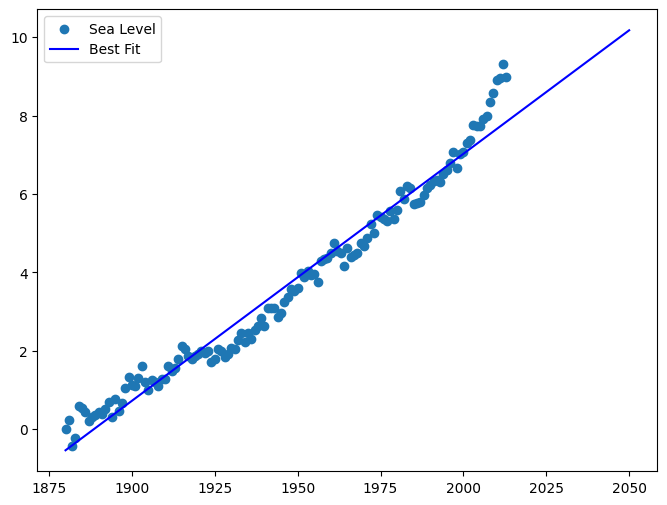

In [74]:
# Create first line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
plt.legend()
plt.show()

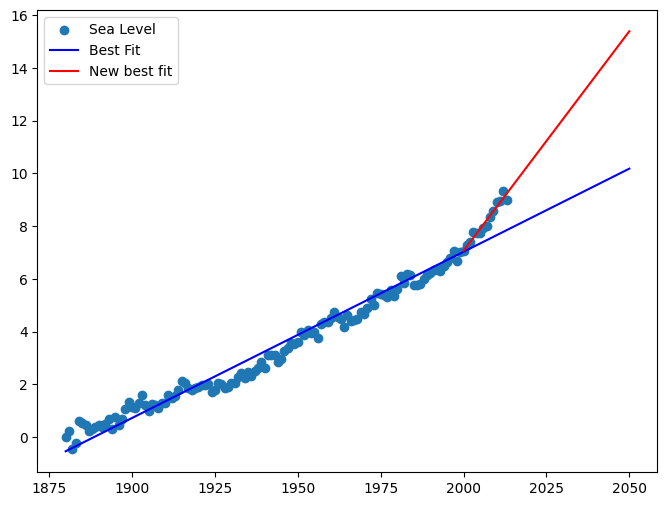

In [85]:
# Create second line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] > 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] > 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.legend()
plt.show()

In [82]:
df[['Year', 'CSIRO Adjusted Sea Level']][df['Year'] > 2000]

,Year,CSIRO Adjusted Sea Level
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614
130,2010,8.901575


In [83]:
df[['Year', 'CSIRO Adjusted Sea Level']].loc[df['Year'] > 2000]

,Year,CSIRO Adjusted Sea Level
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614
130,2010,8.901575


In [ ]:
# Add labels and title


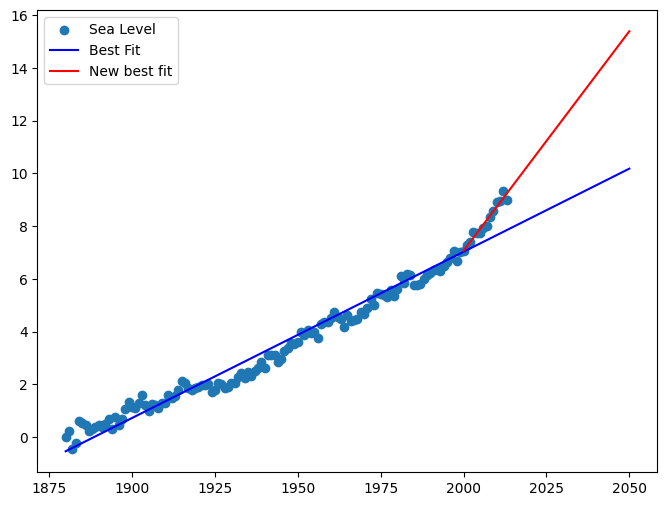

In [86]:
# Create second line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] > 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] > 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')


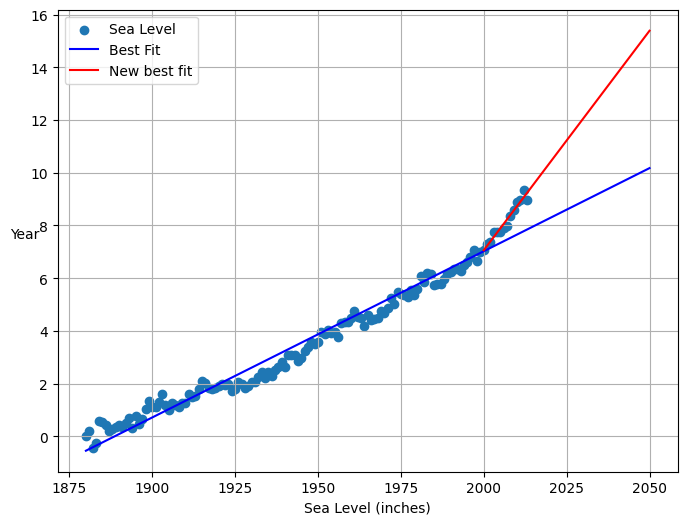

In [92]:
# Create second line of best fit
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label= 'Sea Level')
slope, intercept, r, p, se = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
fit_x1 = pd.Series([df['Year'].min(), 2050])
fit_y1 = slope * fit_x1 + intercept
axes.plot(fit_x1, fit_y1, label= 'Best Fit',color= 'b')
slope_2, intercept_2, r_2, p_2, se_2 = linregress(
    df['Year'].loc[df['Year'] > 2000], 
    df['CSIRO Adjusted Sea Level'].loc[df['Year'] > 2000])
fit_x2 = pd.Series([2000,2050])
fit_y2 = slope_2 * fit_x2 + intercept_2
axes.plot(fit_x2, fit_y2, label= 'New best fit', color='r')
plt.ylabel('Year', rotation= 0) 
plt.xlabel('Sea Level (inches)')
plt.legend()
plt.grid()